<a href="https://colab.research.google.com/github/cychen116/DataAnalysis_practice/blob/main/17_ML_ConvolutionalNeuralNetworks_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
import tensorflow as tf
from keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential #<<<-- Neural Network class
from keras.layers import Conv2D #<<<--- Convolutional layre
from keras.layers import MaxPooling2D #<<< -- pooling layer
from keras.layers import Dense #<<<
from keras.layers import Flatten #<<<
from tensorflow.keras.optimizers import SGD #<<< Simple Graddient Descent

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2184580212662877906
 xla_global_id: -1]

In [6]:
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = mnist.load_data()
  # reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

In [8]:
trainX, trainY, testX, testY = load_dataset()

11501568/11490434 [==============================] - 0s 0us/step


In [9]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [10]:
trainX, testX = prep_pixels(trainX, testX)
trainX[0].shape

(28, 28, 1)

In [11]:
def define_model():
  model = Sequential()
  model.add(Conv2D(64,(5,5),activation='relu',kernel_initializer='he_uniform',input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return(model)
  
def evaluate_model(dataX, dataY, n_folds=2):
  scores, histories = list(), list()
  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)

  i=0
  for train_ix, test_ix in kfold.split(dataX):
    print("Fold",i)
    i+=1

    model=define_model()
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    history = model.fit(trainX, trainY,epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
    _, acc = model.evaluate(testX, testY, verbose=1)
    print('> %.3f' % (acc * 100.0))
    scores.append(acc)
    histories.append(history)
  return scores, histories

In [12]:
scores, histories = evaluate_model(trainX, trainY)

Fold 0


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
938/938 [==============================] - 34s 36ms/step - loss: 0.2116 - accuracy: 0.9342 - val_loss: 0.0977 - val_accuracy: 0.9703
Epoch 2/10
938/938 [==============================] - 34s 36ms/step - loss: 0.0635 - accuracy: 0.9797 - val_loss: 0.0698 - val_accuracy: 0.9788
Epoch 3/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0378 - accuracy: 0.9881 - val_loss: 0.0580 - val_accuracy: 0.9826
Epoch 4/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0220 - accuracy: 0.9935 - val_loss: 0.0644 - val_accuracy: 0.9813
Epoch 5/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0153 - accuracy: 0.9956 - val_loss: 0.0552 - val_accuracy: 0.9836
Epoch 6/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0093 - accuracy: 0.9976 - val_loss: 0.0565 - val_accuracy: 0.9844
Epoch 7/10
938/938 [==============================] - 32s 34ms/step - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.0548 - val_accuracy:

In [13]:
model=define_model()
history = model.fit(trainX, trainY,epochs=5, batch_size=32, validation_data=(testX, testY), verbose=1)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1875/1875 [==============================] - 56s 30ms/step - loss: 0.1400 - accuracy: 0.9567 - val_loss: 0.0483 - val_accuracy: 0.9859
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0447 - accuracy: 0.9869 - val_loss: 0.0355 - val_accuracy: 0.9890
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0327 - val_accuracy: 0.9883
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.0350 - val_accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0125 - accuracy: 0.9966 - val_loss: 0.0349 - val_accuracy: 0.9893


In [14]:
conv=model.layers[0]

In [15]:
import numpy as np
kernels = np.zeros((32,3,3))
for i in range(3):
  for j in range(3):
    for k in range(32):
      print(conv.weights[i][j][k])
      #kernels[k][i][j]=

tf.Tensor(
[[ 0.2931364  -0.09989862 -0.5154263   0.20816976  0.12465586 -0.55443776
  -0.08635303  0.39494047  0.35670996 -0.28895333  0.24652761 -0.29174325
  -0.499621    0.15806916  0.19699919 -0.35094026 -0.3067524  -0.2518922
   0.3955405  -0.10204446  0.16120034  0.26173532  0.40628886 -0.06772821
   0.20538114 -0.34234494 -0.17503281  0.33050245 -0.26094767 -0.36705408
  -0.24054107 -0.27437615  0.2454468  -0.0240577  -0.16188473 -0.0571483
  -0.10473654  0.35914785 -0.1585738   0.21669112 -0.5828284   0.40966168
   0.31239814  0.15989074  0.02662769 -0.5278803   0.33187324 -0.09646077
  -0.45974985  0.09127772 -0.07099057  0.29653075 -0.23722866  0.3105822
  -0.4621613  -0.18539229 -0.32469735  0.18218148 -0.48310798  0.01946167
   0.2487121   0.41646188 -0.05616592 -0.30267447]], shape=(1, 64), dtype=float32)
tf.Tensor(
[[-0.42765048 -0.19637361  0.10949373 -0.02263068 -0.26971027 -0.37846246
  -0.06697907 -0.08312245 -0.24456924 -0.35341924  0.0232786   0.14928849
   0.32567

InvalidArgumentError: ignored

In [16]:
def restack_kernel(kernel, separator_width=0, separator_value=0.0):
    #split the tensor into 2D slices and then restack them
    stack = []
    
    n1, n2, n3, n4 = kernel.shape
    for i in range(n3):
        cur_slices = []
        for j in range(n4):
            cur_slices.append(kernel[:, :, i, j])
            if j != n4-1 and separator_width > 0:
                #add in a vertical separator image
                cur_slices.append(np.repeat(separator_value, n1).reshape((-1, 1)))
        row_stack = np.hstack(cur_slices)
        stack.append(row_stack)
        if i != n3-1 and separator_width > 0:
            #add a horizontal separator
            stack.append(np.repeat(separator_value, row_stack.shape[1]).reshape((1, -1)))
    
    stacked = np.vstack(stack)
    return stacked

def stacked_heatmaps_kernel_plot(
    kernel, 
    axis_ordering=None,
    clip_percentile=99.5,
    separator_width=1,
    separator_value=0.0,
    cmap=None,
    ax=None,
    imshow_kwargs=None,
):
    #optionally reorder the axes 
    if not axis_ordering is None:
        kernel = kernel.transpose(axis_ordering)
    
    if cmap is None:
        cmap = 'RdYlBu_r'
    
    if ax is None:
        fig, ax = plt.subplots()
        
    if imshow_kwargs is None:
        imshow_kwargs = {}
    
    stacked = restack_kernel(kernel, separator_width=separator_width, separator_value=separator_value)
    
    clip_mag = np.percentile(np.abs(stacked), clip_percentile)
    
    im = ax.imshow(stacked, cmap=cmap, vmin=-clip_mag, vmax=clip_mag, **imshow_kwargs)
    return im

In [17]:
import keras.backend as K
conv_kernels = [K.get_value(l.kernel) for l in model.layers if isinstance(l, Conv2D)]

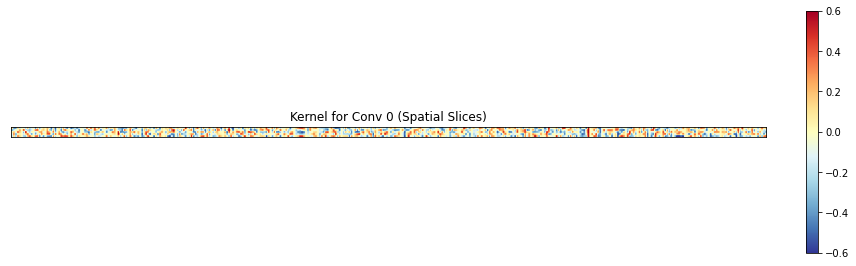

In [18]:
import matplotlib.pyplot as plt
for conv_index, kernel in enumerate(conv_kernels):
    figsize=(12, 6)
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title("Kernel for Conv {} (Spatial Slices)".format(conv_index))
    im = stacked_heatmaps_kernel_plot(kernel, ax=ax)
    plt.colorbar(im, fraction=0.015)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.tight_layout()
    if conv_index == 1:
        #save the second image out as the teaser image for this post
        fig.savefig("../images/visualizing_convolution_kernels_teaser.png")
    plt.show()